In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro
from scipy import stats

In [5]:
df = pd.read_csv('data/Unions and State Labor Law/Unions and State Labor Law_data', sep='\s+')

In [6]:
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [7]:
df_law_applies = df[df['COMP'] == 1]
df_law_doesnt_apply = df[df['COMP'] == 0]

### Visualisation

In [41]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), label='law_applies', density=1)
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), label='law_doesnt_apply', density=1)
    plt.axvline(x.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='orange', alpha=0.8, linestyle='dashed')
    plt.legend()

In [30]:
mu = np.mean(df_law_applies['DENS'])
sigma = np.std(df_law_applies['DENS'])
x_1 = np.linspace(np.min(df_law_applies['DENS']), np.max(df_law_applies['DENS']), 300)

mu1 = np.mean(df_law_doesnt_apply['DENS'])
sigma1 = np.std(df_law_doesnt_apply['DENS'])
x_2 = np.linspace(np.min(df_law_doesnt_apply['DENS']), np.max(df_law_doesnt_apply['DENS']), 300)

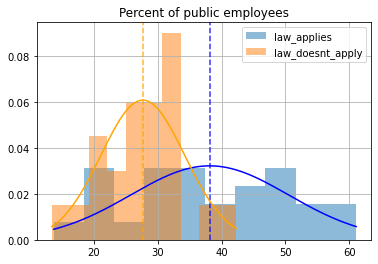

In [42]:
two_histograms(df_law_applies['DENS'], df_law_doesnt_apply['DENS'])
plt.title('Percent of public employees')
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma), color='blue')
plt.plot(x_2, stats.norm.pdf(x_2, mu1, sigma1), color='orange')

In [35]:
res = shapiro(df_law_applies['DENS'])
print("p_value: ",res[1])

p_value:  0.7401027679443359


In [36]:
res = shapiro(df_law_doesnt_apply['DENS'])
print("p_value: ", res[1])

p_value:  0.943257212638855


#### Критерий Шапиро говорит вполне однозначно, что эти распределения нормальны
Значит будем пробовать критерий Стьюдента

In [38]:
res = stats.fligner(df_law_applies['DENS'], df_law_doesnt_apply['DENS'])
print('p-value: ', res[1])

p-value:  0.0022863939638667475


Дисперсии не равны

In [43]:
res = stats.ttest_ind(df_law_applies['DENS'], df_law_doesnt_apply['DENS'], equal_var=False)
print('p-value: ', res[1])

p-value:  0.0005628173082035911


Критерий Стьюдента говорит о том, что гипотеза отвергается. Средние не равны.

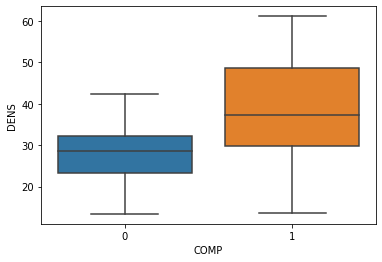

In [46]:
sns.boxplot(x='COMP', y='DENS', data=df)